# Exact sampling of Brownian path and Geometric Brownian path


## Abstract
You will learn eact sampling of BM path and GBM path

Reference: 

[1] Section 3.1 of [Gla03]: Random walk construction


## Analysis


To have exact simulation of Brownian path by random walk, one can follow (3.2) of [1], i.e.
$$W(t_{i+1}) = W(t_i) + \sqrt{t_{i+1} - t_i} Z_{i+1}.$$

### A function to generate a BM path using uniform mesh

Given an interval $[0,T]$, we can generate exact simulation with $n$ uniform mesh by
$$\hat W(t_{i+1}) = \hat W(t_i) + \frac{1}{\sqrt n} Z_{i+1}, \hbox{ for } i = 0, 1, \ldots, n-1.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate one path

In [2]:
#Construct (W(t_i): 1 <= i <= n) for exact simulation of 1-d BM on [T1, T2]

T1, T2, n = 0., 1., 10 #init start time, end time, and the mesh number
t = np.linspace(T1, T2, num = n+1) #init mesh
W = np.zeros(n+1) #init BM

#Run (3.2)
for i in range(n):
    W[i+1] = W[i] + 1./np.sqrt(n) * np.random.normal()
    
print(t, W)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [ 0.          0.07648039  0.36119047  0.16984442 -0.2767042  -0.49094208
 -0.67413672 -0.37568844 -0.84025822 -0.39934476 -0.72955998]


In [3]:
#define a function of BM path generator
def BM_gen(T1, T2, n):  #para: start time, end time, and the mesh number 
    t = np.linspace(T1, T2, num = n+1) #init mesh
    W = np.zeros(n+1) #init BM
    #Run (3.2)
    for i in range(n):
        W[i+1] = W[i] + 1./np.sqrt(n) * np.random.normal()
        
    return t, W
    

Generate multiple paths and plot

mean is 0.12067782118034895 Variance is 0.8895130681835471


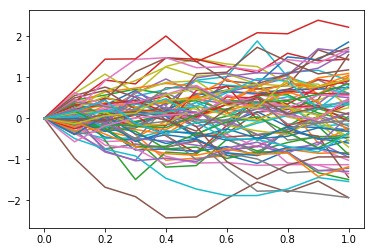

In [4]:
#test BM_gen and plot
#Also compute average and variance of $W(n)$

MeshN = 10; SimN = 80; #Mesh number and simulation number
SumW = 0; SqsumW = 0 #init sum of $W(n)$ and sum of $W^2(n)$
for i in range(SimN):
    [t,W] = BM_gen(0., 1., MeshN)
    SumW += W[MeshN]; SqsumW += np.square(W[MeshN])
    plt.plot(t, W);
    
MeanW = SumW/SimN; VarW = SqsumW/SimN - MeanW**2    
print("mean is", MeanW, "Variance is", VarW)

**Generating GBM path**

GBM is given by
$$X(t) = x_0 \exp\{(r - \frac 1 2 \sigma^2)t + \sigma W(t)\}.$$
We can replace $W(t)$ by its exact simulation $\hat W(t)$ to get exact simulation of $X(t)$, i.e.
$$\hat X(t) = x_0 \exp\{(r - \frac 1 2 \sigma^2)t + \sigma \hat W(t)\}.$$

**Application to Arithmetic asian option price**

Arithmetic asian call option with maturity $T$ and strick $K$ has its pay off as
$$C(T) = (A(T) - K)^+,$$
where $A(T)$ is arithmetic average of the stock price at times
$0 \le t_1 < t_2, \ldots, < t_n = T$, i.e.
$$A(T) = \frac{1}{n} \sum_{i=1}^n S(t_i).$$

The call price can be thus written by
$$C_0 = \mathbb E [e^{-rT} (A(T) - K)^+].$$
Unlike the geometric asian option, arithetic counterpart does not have explicit formula for its price.
In this below, we shall use MC.


**Ex.**
Find arithmetic asian call price for the following parameters:


In [5]:
#An example is given here
S0 = 100.0
K = 110.0
r=0.0475
sigma = 0.20
T = 1.
Otype='C'
delta = 0.
n = 5



In [6]:
t = np.linspace(0., T, n)
#compute call price
payoff = 0
sim_N = 2000 #number of simulations
for i in range(sim_N): 
    [t,W] = BM_gen(0., T, n-1) #BM path
    S = S0 * np.exp((r - sigma**2/2.) * t + sigma * W)  #GBM path
    AT = np.mean(S)
    payoff = payoff + np.exp(-r*T)*np.max([AT-K, 0])
    
payoff = payoff/sim_N
print('call price is ' + str(payoff))

    

call price is 1.8409569276194744


**Q** With parameters above, we have $GAC < AAC < EC$. Is it always true?